# Subtype predictor -- single cell QC

In this file I will QC the HGSC single cell data from 

H5AD from: https://cellxgene.cziscience.com/collections/4796c91c-9d8f-4692-be43-347b1727f9d8

data is from: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE180661

20 single-cell samples (14 donors)

manuscript of data: Vázquez-García I, Uhlitz F, Ceglia N, Lim JLP et al. Ovarian cancer mutational processes drive site-specific immune evasion. Nature 2022 Dec;612(7941):778-786. PMID: 36517593


I will make the typical QC plots, then write it out for making pseudobulks

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
from matplotlib.pyplot import rc_context

import os
import gc

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

data_path = f"{os.getcwd()}/../../data/single_cell/"

in_ad_file = f"{data_path}/GSE180661_RAW/GSE180661_subset.h5ad"
result_ad_file = f"{data_path}/GSE180661_processed/GSE180661_processed.h5ad"


2025-01-07 11:44:06.853654: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-07 11:44:06.873165: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-07 11:44:07.070054: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-07 11:44:07.243074: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736275447.380540 2262579 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736275447.42

scanpy==1.10.4 anndata==0.8.0 umap==0.5.2 numpy==1.26.0 scipy==1.14.1 pandas==1.5.3 scikit-learn==1.6.0 statsmodels==0.14.4 igraph==0.11.8 pynndescent==0.5.13


In [2]:
adata = sc.read_h5ad(in_ad_file)
adata

AnnData object with n_obs × n_vars = 144718 × 27230
    obs: 'percent.mt', 'percent.rb', 'doublet', 'author_sample_id', 'S.Score', 'G2M.Score', 'Phase', 'CC.Diff', 'author_cell_type', 'nCount_RNA', 'nFeature_RNA', 'doublet_score', 'organism_ontology_term_id', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'suspension_type', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'donor_id', 'author_tumor_supersite', 'author_tumor_site', 'author_tumor_subsite', 'author_sort_parameters', 'author_therapy', 'author_procedure', 'author_procedure_type', 'is_primary_data', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'celltype_granular', 'scpred_CellType', 'cellType', 'sample_id', 'stim', 'n_genes'

In [3]:
adata.obs.author_cell_type.value_counts()

T.cell                 42774
Ovarian.cancer.cell    36590
Fibroblast             29409
Monocyte               20384
B.cell                  5296
Endothelial.cell        5232
Plasma.cell             5033
Name: author_cell_type, dtype: int64

In [4]:
adata.obs

percent.mt  percent.rb  \
SPECTRUM-OV-115_S1_CD45N_INFRACOLIC_OMENTUM_AAA...   17.755510   28.188377   
SPECTRUM-OV-115_S1_CD45N_INFRACOLIC_OMENTUM_AAA...    8.683013   33.341759   
SPECTRUM-OV-115_S1_CD45N_INFRACOLIC_OMENTUM_AAA...   15.009747    2.664068   
SPECTRUM-OV-115_S1_CD45N_INFRACOLIC_OMENTUM_AAA...   19.690424   29.853611   
SPECTRUM-OV-115_S1_CD45N_INFRACOLIC_OMENTUM_AAA...   14.347079   15.721649   
...                                                        ...         ...   
SPECTRUM-OV-049_S1_CD45P_INFRACOLIC_OMENTUM_TTT...    4.083743   17.963299   
SPECTRUM-OV-049_S1_CD45P_INFRACOLIC_OMENTUM_TTT...   10.334573   40.024784   
SPECTRUM-OV-049_S1_CD45P_INFRACOLIC_OMENTUM_TTT...    5.497847   17.658981   
SPECTRUM-OV-049_S1_CD45P_INFRACOLIC_OMENTUM_TTT...   13.989637    1.986183   
SPECTRUM-OV-049_S1_CD45P_INFRACOLIC_OMENTUM_TTT...    7.776802   23.022846   

                                                    doublet  \
SPECTRUM-OV-115_S1_CD45N_INFRACOLIC_OMENTUM_AAA...    False   
SPECTRUM-OV-115_S1_CD45N_INFRACOLIC_OMENTUM_AAA...    False   
SPECTRUM-OV-115_S1_CD45N_INFRACOLIC_OMENTUM_AAA...    False   
SPECTRUM-OV-115_S1_CD45N_INFRACOLIC_OMENTUM_AAA...    False   
SPECTRUM-OV-115_S1_CD45N_INFRACOLIC_OMENTUM_AAA...    False   
...                                                     ...   
SPECTRUM-OV-049_S1_CD45P_INFRACOLIC_OMENTUM_TTT...    False   
SPECTRUM-OV-049_S1_CD45P_INFRACOLIC_OMENTUM_TTT...    False   
SPECTRUM-OV-049_S1_CD45P_INFRACOLIC_OMENTUM_TTT...    False   
SPECTRUM-OV-049_S1_CD45P_INFRACOLIC_OMENTUM_TTT...    False   
SPECTRUM-OV-049_S1_CD45P_INFRACOLIC_OMENTUM_TTT...    False   

                                                                               author_sample_id  \
SPECTRUM-OV-115_S1_CD45N_INFRACOLIC_OMENTUM_AAA...  SPECTRUM-OV-115_S1_CD45N_INFRACOLIC_OMENTUM   
SPECTRUM-OV-115_S1_CD45N_INFRACOLIC_OMENTUM_AAA...  SPECTRUM-OV-115_S1_CD45N_INFRACOLIC_OMENTUM   
SPECTRUM-OV-115_S1_CD45N_INFRACOLIC_OMENTUM_AAA...  SPECTRUM-OV-115_S1_CD45N_INFRACOLIC_OMENTUM   
SPECTRUM-OV-115_S1_CD45N_INFRACOLIC_OMENTUM_AAA...  SPECTRUM-OV-115_S1_CD45N_INFRACOLIC_OMENTUM   
SPECTRUM-OV-115_S1_CD45N_INFRACOLIC_OMENTUM_AAA...  SPECTRUM-OV-115_S1_CD45N_INFRACOLIC_OMENTUM   
...                                                                                         ...   
SPECTRUM-OV-049_S1_CD45P_INFRACOLIC_OMENTUM_TTT...  SPECTRUM-OV-049_S1_CD45P_INFRACOLIC_OMENTUM   
SPECTRUM-OV-049_S1_CD45P_INFRACOLIC_OMENTUM_TTT...  SPECTRUM-OV-049_S1_CD45P_INFRACOLIC_OMENTUM   
SPECTRUM-OV-049_S1_CD45P_INFRACOLIC_OMENTUM_TTT...  SPECTRUM-OV-049_S1_CD45P_INFRACOLIC_OMENTUM   
SPECTRUM-OV-049_S1_CD45P_INFRACOLIC_OMENTUM_TTT...  SPECTRUM-OV-049_S1_CD45P_INFRACOLIC_OMENTUM   
SPECTRUM-OV-049_S1_CD45P_INFRACOLIC_OMENTUM_TTT...  SPECTRUM-OV-049_S1_CD45P_INFRACOLIC_OMENTUM   

                                                     S.Score  G2M.Score Phase  \
SPECTRUM-OV-115_S1_CD45N_INFRACOLIC_OMENTUM_AAA... -0.208309  -0.354518    G1   
SPECTRUM-OV-115_S1_CD45N_INFRACOLIC_OMENTUM_AAA...  0.067650  -0.143227     S   
SPECTRUM-OV-115_S1_CD45N_INFRACOLIC_OMENTUM_AAA... -0.022789  -0.024090    G1   
SPECTRUM-OV-115_S1_CD45N_INFRACOLIC_OMENTUM_AAA... -0.054722  -0.130928    G1   
SPECTRUM-OV-115_S1_CD45N_INFRACOLIC_OMENTUM_AAA... -0.027817  -0.138691    G1   
...                                                      ...        ...   ...   
SPECTRUM-OV-049_S1_CD45P_INFRACOLIC_OMENTUM_TTT...  0.039170  -0.019346     S   
SPECTRUM-OV-049_S1_CD45P_INFRACOLIC_OMENTUM_TTT... -0.005248   0.037796   G2M   
SPECTRUM-OV-049_S1_CD45P_INFRACOLIC_OMENTUM_TTT...  0.067429  -0.019236     S   
SPECTRUM-OV-049_S1_CD45P_INFRACOLIC_OMENTUM_TTT... -0.007983   0.012093   G2M   
SPECTRUM-OV-049_S1_CD45P_INFRACOLIC_OMENTUM_TTT... -0.030082  -0.031867    G1   

                                                     CC.Diff  \
SPECTRUM-OV-115_S1_CD45N_INFRACOLIC_OMENTUM_AAA...  0.146209   
SPECTRUM-OV-115_S1_CD45N_INFRACOLIC_OMENTUM_AAA...  0.210878   
SPEC

In [5]:
adata.obs.donor_id.unique()

['SPECTRUM-OV-115', 'SPECTRUM-OV-107', 'SPECTRUM-OV-110', 'SPECTRUM-OV-083', 'SPECTRUM-OV-081', ..., 'SPECTRUM-OV-008', 'SPECTRUM-OV-009', 'SPECTRUM-OV-036', 'SPECTRUM-OV-053', 'SPECTRUM-OV-049']
Length: 14
Categories (14, object): ['SPECTRUM-OV-008', 'SPECTRUM-OV-009', 'SPECTRUM-OV-024', 'SPECTRUM-OV-036', ..., 'SPECTRUM-OV-083', 'SPECTRUM-OV-107', 'SPECTRUM-OV-110', 'SPECTRUM-OV-115']

In [6]:
tab = adata.obs.groupby(['sample_id', 'cellType']).size()
tab.unstack()

cellType                                            B.cell  Endothelial.cell  \
sample_id                                                                      
SPECTRUM-OV-008_S1_LEFT_PARARENAL_LYMPH_NODE_WI...     948               280   
SPECTRUM-OV-009_S1_BOWEL                                67               106   
SPECTRUM-OV-024_S1_INFRACOLIC_OMENTUM                   87               123   
SPECTRUM-OV-036_S1_INFRACOLIC_OMENTUM                   78               110   
SPECTRUM-OV-036_S1_LEFT_ADNEXA                          51               134   
SPECTRUM-OV-049_S1_INFRACOLIC_OMENTUM                  801               450   
SPECTRUM-OV-053_S1_INFRACOLIC_OMENTUM                  410               522   
SPECTRUM-OV-053_S1_LEFT_OVARY                           72               365   
SPECTRUM-OV-053_S1_RIGHT_DIAPHRAGM                     154               659   
SPECTRUM-OV-065_S1_INFRACOLIC_OMENTUM                  303               249   
SPECTRUM-OV-068_S1_LARGE_BOWEL                         336               227   
SPECTRUM-OV-075_S1_LEFT_FALLOPIAN_TUBE                  83               246   
SPECTRUM-OV-081_S1_INFRACOLIC_OMENTUM                  691                58   
SPECTRUM-OV-081_S1_RIGHT_ADNEXA                         77                70   
SPECTRUM-OV-083_S1_INFRACOLIC_OMENTUM                   95               367   
SPECTRUM-OV-107_S1_BOWEL                               642                53   
SPECTRUM-OV-110_S1_BOWEL                                72               468   
SPECTRUM-OV-110_S1_INFRACOLIC_OMENTUM                   78               182   
SPECTRUM-OV-115_S1_INFRACOLIC_OMENTUM                  138               337   
SPECTRUM-OV-115_S1_LEFT_ADNEXA                         113               226   

cellType                                            Fibroblast  Monocyte  \
sample_id                                                                  
SPECTRUM-OV-008_S1_LEFT_PARARENAL_LYMPH_NODE_WI...          73       114   
SPECTRUM-OV-009_S1_BOWEL                                   194      1996   
SPECTRUM-OV-024_S1_INFRACOLIC_OMENTUM                      670       426   
SPECTRUM-OV-036_S1_INFRACOLIC_OMENTUM                      272       151   
SPECTRUM-OV-036_S1_LEFT_ADNEXA                             124       736   
SPECTRUM-OV-049_S1_INFRACOLIC_OMENTUM                     2095       587   
SPECTRUM-OV-053_S1_INFRACOLIC_OMENTUM                     2721       388   
SPECTRUM-OV-053_S1_LEFT_OVARY                             2342      2289   
SPECTRUM-OV-053_S1_RIGHT_DIAPHRAGM                        2150      1765   
SPECTRUM-OV-065_S1_INFRACOLIC_OMENTUM                      333       545   
SPECTRUM-OV-068_S1_LARGE_BOWEL                            3814       414   
SPECTRUM-OV-075_S1_LEFT_FALLOPIAN_TUBE                    1309      1025   
SPECTRUM-OV-081_S1_INFRACOLIC_OMENTUM                      358       247   
SPECTRUM-OV-081_S1_RIGHT_ADNEXA                            270       541   
SPECTRUM-OV-083_S1_INFRACOLIC_OMENTUM                      885      1522   
SPECTRUM-OV-107_S1_BOWEL                                   372      1171   
SPECTRUM-OV-110_S1_BOWEL                                  4720      1436   
SPECTRUM-OV-110_S1_INFRACOLIC_OMENTUM                     1176      2111   
SPECTRUM-OV-115_S1_INFRACOLIC_OMENTUM                     1510      1075   
SPECTRUM-OV-115_S1_LEFT_ADNEXA                            4021      1845   

cellType                                            Ovarian.cancer.cell  \
sample_id                                                                 
SPECTRUM-OV-008_S1_LEFT_PARARENAL_LYMPH_NODE_WI...                  314   
SPECTRUM-OV-009_S1_BOWEL                                           3138   
SPECTRUM-OV-024_S1_INFRACOLIC_OMENTUM                               794   
SPECTRUM-OV-036_S1_INFRACOLIC_OMENTUM                              2141   
SPECTRUM-OV-036_S1_LEFT_ADNEXA                                     2499   
SPECTRUM-OV-049_S1_INFRACOLIC_OMENTUM    

In [7]:
adata.var.index

Index(['AL627309.1', 'AL627309.3', 'AL627309.4', 'AL732372.1', 'AL669831.2',
       'AL669831.5', 'FAM87B', 'LINC00115', 'FAM41C', 'AL645608.7',
       ...
       'MAFIP', 'AC011043.1', 'AL592183.1', 'AC007325.4', 'AC007325.2',
       'AL354822.1', 'AC004556.1', 'AC233755.2', 'AC233755.1', 'AC240274.1'],
      dtype='object', name='index', length=27230)

In [8]:
# remove genes that are duplicated
adata.var["gene_ids"] = adata.var.index.to_list()
a = (adata.var['gene_ids'].value_counts() == 1)
a = a[a].keys().to_list()
unique_genes = np.unique(a)

adata = adata[:, adata.var['gene_ids'].isin(unique_genes)]

# make the common name the index
adata.var.index = adata.var['gene_ids']


# QC everything

In [9]:
# how many of each samp
adata.obs["sample_id"].value_counts()

SPECTRUM-OV-115_S1_LEFT_ADNEXA                                         10353
SPECTRUM-OV-083_S1_INFRACOLIC_OMENTUM                                   9926
SPECTRUM-OV-110_S1_BOWEL                                                9697
SPECTRUM-OV-068_S1_LARGE_BOWEL                                          8690
SPECTRUM-OV-053_S1_LEFT_OVARY                                           8397
SPECTRUM-OV-036_S1_LEFT_ADNEXA                                          8098
SPECTRUM-OV-115_S1_INFRACOLIC_OMENTUM                                   7916
SPECTRUM-OV-049_S1_INFRACOLIC_OMENTUM                                   7853
SPECTRUM-OV-075_S1_LEFT_FALLOPIAN_TUBE                                  7567
SPECTRUM-OV-009_S1_BOWEL                                                7417
SPECTRUM-OV-053_S1_RIGHT_DIAPHRAGM                                      7410
SPECTRUM-OV-110_S1_INFRACOLIC_OMENTUM                                   6992
SPECTRUM-OV-053_S1_INFRACOLIC_OMENTUM                                   6280

In [10]:
# see cell types, we will merge some
tab = adata.obs.groupby(['scpred_CellType', 'sample_id']).size()

tab.unstack()

sample_id            SPECTRUM-OV-008_S1_LEFT_PARARENAL_LYMPH_NODE_WITH_COLONIC_MESENTARY  \
scpred_CellType                                                                            
B.cell                                                             948                     
Endothelial.cell                                                   280                     
Fibroblast                                                          73                     
Monocyte                                                           114                     
Ovarian.cancer.cell                                                314                     
Plasma.cell                                                        213                     
T.cell                                                            3216                     

sample_id            SPECTRUM-OV-009_S1_BOWEL  \
scpred_CellType                                 
B.cell                                     67   
Endothelial.cell                          106   
Fibroblast                                194   
Monocyte                                 1996   
Ovarian.cancer.cell                      3138   
Plasma.cell                               181   
T.cell                                   1735   

sample_id            SPECTRUM-OV-024_S1_INFRACOLIC_OMENTUM  \
scpred_CellType                                              
B.cell                                                  87   
Endothelial.cell                                       123   
Fibroblast                                             670   
Monocyte                                               426   
Ovarian.cancer.cell                                    794   
Plasma.cell                                            180   
T.cell                                                2948   

sample_id            SPECTRUM-OV-036_S1_INFRACOLIC_OMENTUM  \
scpred_CellType                                              
B.cell                                                  78   
Endothelial.cell                                       110   
Fibroblast                                             272   
Monocyte                                               151   
Ovarian.cancer.cell                                   2141   
Plasma.cell                                            222   
T.cell                                                3062   

sample_id            SPECTRUM-OV-036_S1_LEFT_ADNEXA  \
scpred_CellType                                       
B.cell                                           51   
Endothelial.cell                                134   
Fibroblast                                      124   
Monocyte                                        736   
Ovarian.cancer.cell                            2499   
Plasma.cell                                     399   
T.cell                                         4155   

sample_id            SPECTRUM-OV-049_S1_INFRACOLIC_OMENTUM  \
scpred_CellType                                              
B.cell                                                 801   
Endothelial.cell                                       450   
Fibroblast                                            2095   
Monocyte                                               587   
Ovarian.cancer.cell                                   1305   
Plasma.cell                                            329   
T.cell                                                2286   

sample_id            SPECTRUM-OV-053_S1_INFRACOLIC_OMENTUM  \
scpred_CellType                                              
B.cell                                                 410   
Endothelial.cell                                       522   
Fibroblast                                            2721   
Monocyte                                               388   
Ovarian.cancer.cell                                    447   
Plasma.cell                                            197   
T.cell                                                1595  

In [11]:
# filter out cells with less than 500 genes and genes expressed in less than 3 cells
# this SHOULDNT do anything!! just checking
sc.pp.filter_cells(adata, min_genes=500)
sc.pp.filter_genes(adata, min_cells=3)


/var/projects/proportion_subtype_predictor/.prop_subtype_venv/lib/python3.12/site-packages/scanpy/preprocessing/_simple.py:168: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = number


filtered out 78 genes that are detected in less than 3 cells


In [12]:
# see cell types, we will merge some
tab = adata.obs.groupby(['scpred_CellType', 'sample_id']).size()

tab.unstack()

sample_id            SPECTRUM-OV-008_S1_LEFT_PARARENAL_LYMPH_NODE_WITH_COLONIC_MESENTARY  \
scpred_CellType                                                                            
B.cell                                                             948                     
Endothelial.cell                                                   280                     
Fibroblast                                                          73                     
Monocyte                                                           114                     
Ovarian.cancer.cell                                                314                     
Plasma.cell                                                        213                     
T.cell                                                            3216                     

sample_id            SPECTRUM-OV-009_S1_BOWEL  \
scpred_CellType                                 
B.cell                                     67   
Endothelial.cell                          106   
Fibroblast                                194   
Monocyte                                 1996   
Ovarian.cancer.cell                      3138   
Plasma.cell                               181   
T.cell                                   1735   

sample_id            SPECTRUM-OV-024_S1_INFRACOLIC_OMENTUM  \
scpred_CellType                                              
B.cell                                                  87   
Endothelial.cell                                       123   
Fibroblast                                             670   
Monocyte                                               426   
Ovarian.cancer.cell                                    794   
Plasma.cell                                            180   
T.cell                                                2948   

sample_id            SPECTRUM-OV-036_S1_INFRACOLIC_OMENTUM  \
scpred_CellType                                              
B.cell                                                  78   
Endothelial.cell                                       110   
Fibroblast                                             272   
Monocyte                                               151   
Ovarian.cancer.cell                                   2141   
Plasma.cell                                            222   
T.cell                                                3062   

sample_id            SPECTRUM-OV-036_S1_LEFT_ADNEXA  \
scpred_CellType                                       
B.cell                                           51   
Endothelial.cell                                134   
Fibroblast                                      124   
Monocyte                                        736   
Ovarian.cancer.cell                            2499   
Plasma.cell                                     399   
T.cell                                         4155   

sample_id            SPECTRUM-OV-049_S1_INFRACOLIC_OMENTUM  \
scpred_CellType                                              
B.cell                                                 801   
Endothelial.cell                                       450   
Fibroblast                                            2095   
Monocyte                                               587   
Ovarian.cancer.cell                                   1305   
Plasma.cell                                            329   
T.cell                                                2286   

sample_id            SPECTRUM-OV-053_S1_INFRACOLIC_OMENTUM  \
scpred_CellType                                              
B.cell                                                 410   
Endothelial.cell                                       522   
Fibroblast                                            2721   
Monocyte                                               388   
Ovarian.cancer.cell                                    447   
Plasma.cell                                            197   
T.cell                                                1595  

In [13]:
# see cell types, we will merge some
tab = adata.obs.groupby(['celltype_granular', 'sample_id']).size()

tab.unstack()

sample_id          SPECTRUM-OV-008_S1_LEFT_PARARENAL_LYMPH_NODE_WITH_COLONIC_MESENTARY  \
celltype_granular                                                                        
immune                                                          4491                     
stromal                                                          353                     
tumor                                                            314                     

sample_id          SPECTRUM-OV-009_S1_BOWEL  \
celltype_granular                             
immune                                 3979   
stromal                                 300   
tumor                                  3138   

sample_id          SPECTRUM-OV-024_S1_INFRACOLIC_OMENTUM  \
celltype_granular                                          
immune                                              3641   
stromal                                              793   
tumor                                                794   

sample_id          SPECTRUM-OV-036_S1_INFRACOLIC_OMENTUM  \
celltype_granular                                          
immune                                              3513   
stromal                                              382   
tumor                                               2141   

sample_id          SPECTRUM-OV-036_S1_LEFT_ADNEXA  \
celltype_granular                                   
immune                                       5341   
stromal                                       258   
tumor                                        2499   

sample_id          SPECTRUM-OV-049_S1_INFRACOLIC_OMENTUM  \
celltype_granular                                          
immune                                              4003   
stromal                                             2545   
tumor                                               1305   

sample_id          SPECTRUM-OV-053_S1_INFRACOLIC_OMENTUM  \
celltype_granular                                          
immune                                              2590   
stromal                                             3243   
tumor                                                447   

sample_id          SPECTRUM-OV-053_S1_LEFT_OVARY  \
celltype_granular                                  
immune                                      4952   
stromal                                     2707   
tumor                                        738   

sample_id          SPECTRUM-OV-053_S1_RIGHT_DIAPHRAGM  \
celltype_granular                                       
immune                                           4178   
stromal                                          2809   
tumor                                             423   

sample_id          SPECTRUM-OV-065_S1_INFRACOLIC_OMENTUM  \
celltype_granular                                          
immune                                              3521   
stromal                                              582   
tumor                                               1519   

sample_id          SPECTRUM-OV-068_S1_LARGE_BOWEL  \
celltype_granular                                   
immune                                       2069   
stromal                                      4041   
tumor                                        2580   

sample_id          SPECTRUM-OV-075_S1_LEFT_FALLOPIAN_TUBE  \
celltype_granular                                           
immune                                               2695   
stromal                                              1555   
tumor                                                3317   

sample_id          SPECTRUM-OV-081_S1_INFRACOLIC_OMENTUM  \
celltype_granular                                          
immune                                              2548   
stromal                                              416   
tumor                                               3004   

sample_id          SPECTRUM-OV-081_S1_RIGHT_ADNEXA  \
celltype_granular                                    
immune        

normalizing counts per cell


    finished (0:00:00)


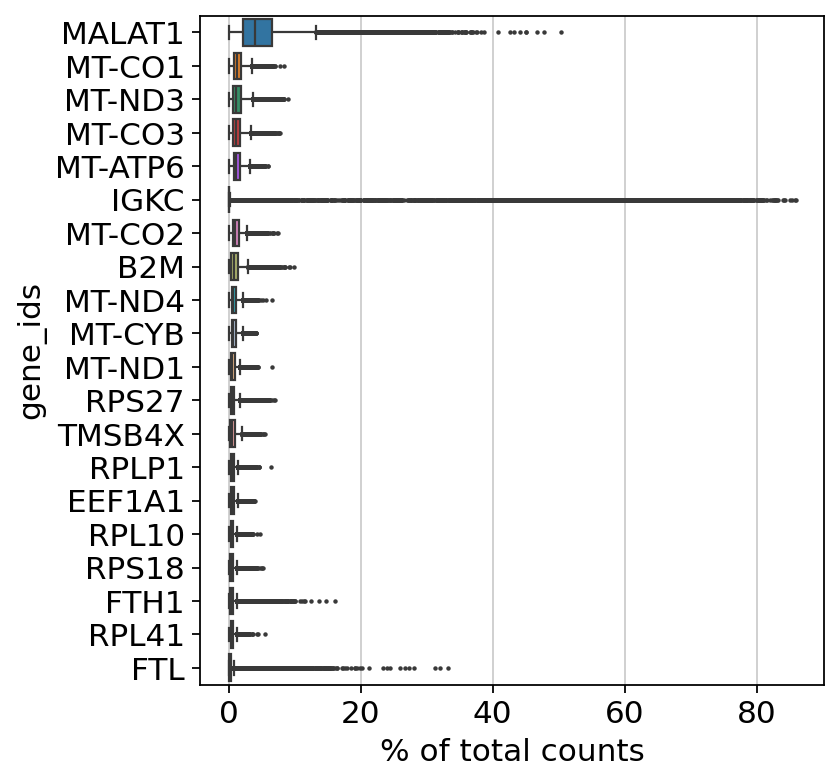

In [14]:
sc.pl.highest_expr_genes(adata, n_top=20, )


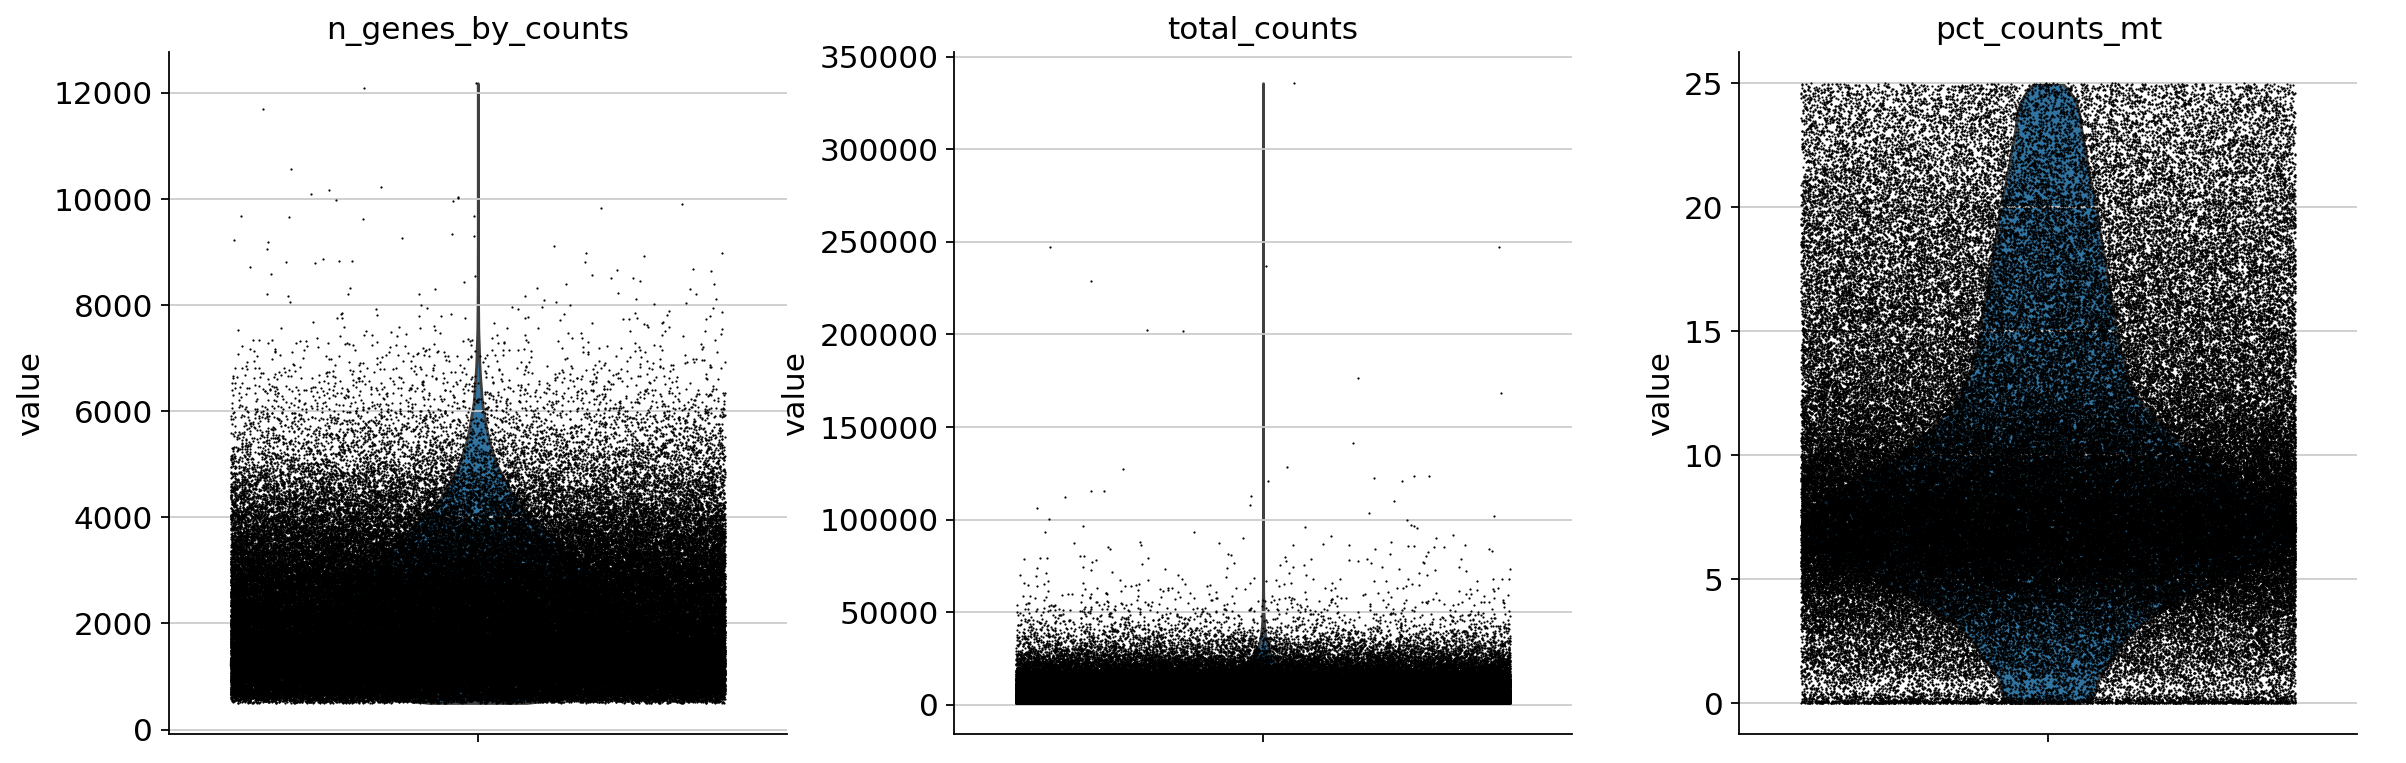

In [15]:
# remove genes with high mitochondrial content
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

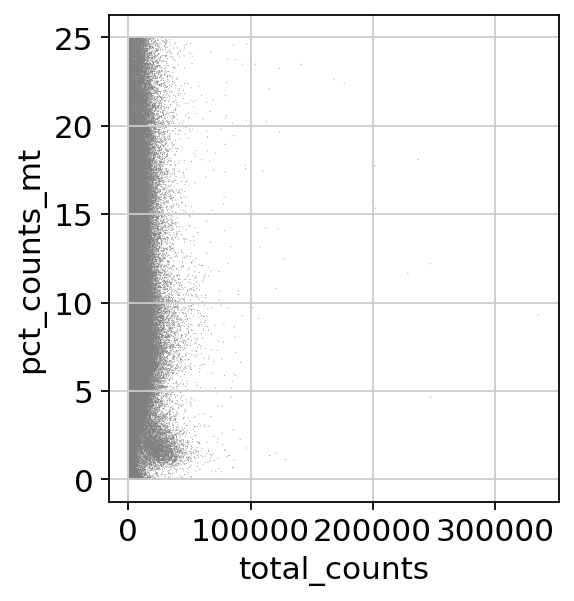

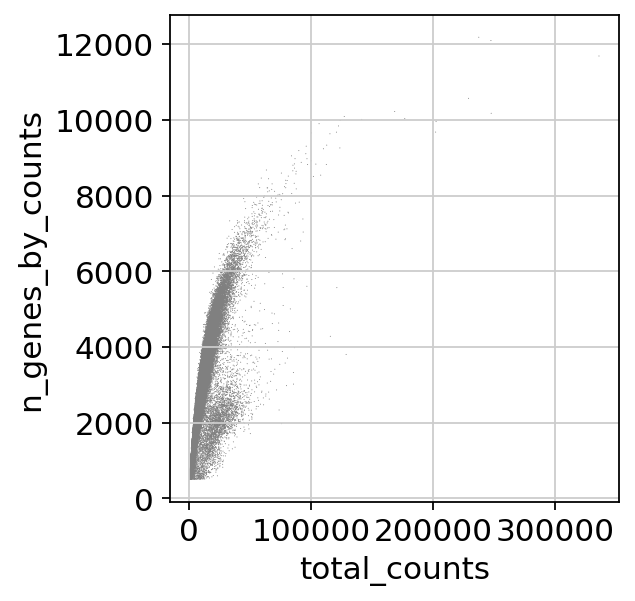

In [16]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [17]:
# slice the data based on the plots from above
# remove cells with more than 7000 genes
# remove cells with more than 10% MTgenes
adata = adata[adata.obs.n_genes_by_counts < 8000, :]
adata = adata[adata.obs.pct_counts_mt < 15, :]

/var/projects/proportion_subtype_predictor/.prop_subtype_venv/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)


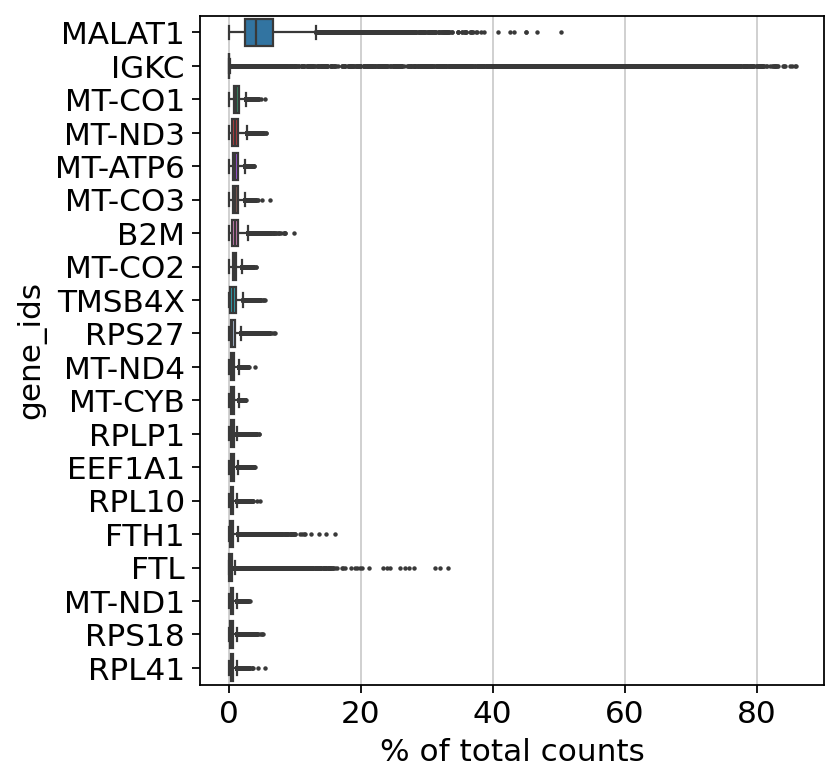

In [18]:
sc.pl.highest_expr_genes(adata, n_top=20, )


## write it out

In [19]:
result_ad_file

'/var/projects/proportion_subtype_predictor/code/0_process_sc/../../data/single_cell//GSE180661_processed/GSE180661_processed.h5ad'

In [20]:
# write it out before normalization
adata.write(result_ad_file)


# Normalization

normalizing counts per cell


    finished (0:00:00)
extracting highly variable genes


/var/projects/proportion_subtype_predictor/.prop_subtype_venv/lib/python3.12/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


    finished (0:00:03)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


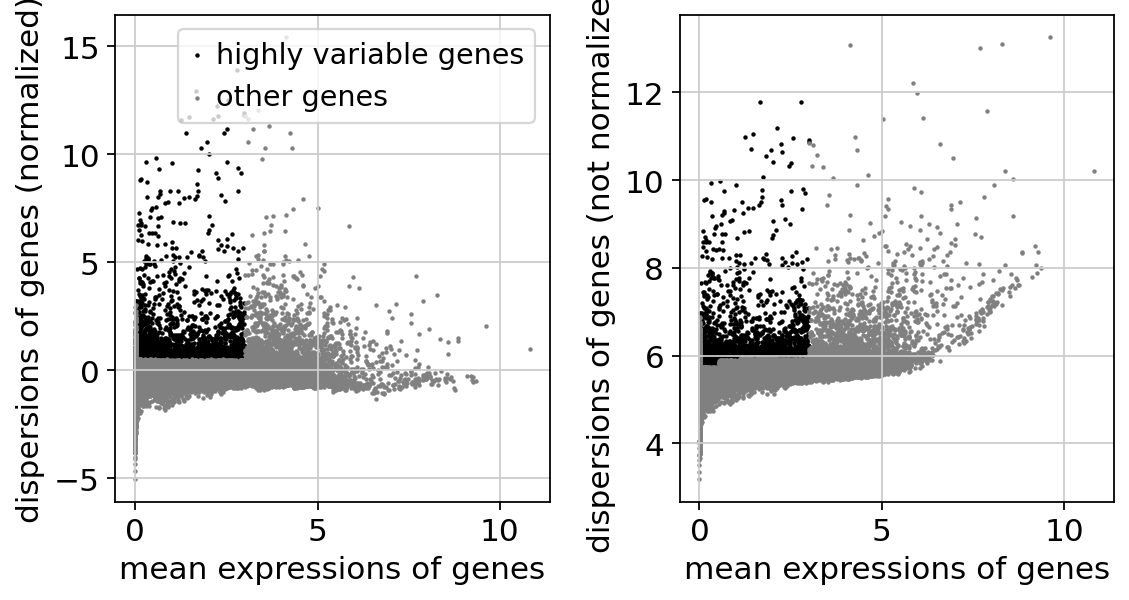

In [21]:
# normalize to 10K counts per cell
sc.pp.normalize_total(adata, target_sum=1e6)

# log data
sc.pp.log1p(adata)

# get high variance genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

# and plot
sc.pl.highly_variable_genes(adata)

# now store the raw version of the data for our use later
adata.raw = adata


In [22]:
# now process the counts further for doing DE 
# analysis and the cell clustering
adata = adata[:, adata.var.highly_variable]

# regress out the signal
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

# scale the genes
sc.pp.scale(adata, max_value=10)

regressing out ['total_counts', 'pct_counts_mt']


/var/projects/proportion_subtype_predictor/.prop_subtype_venv/lib/python3.12/site-packages/scanpy/preprocessing/_simple.py:672: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


    sparse input is densified and may lead to high memory use
    finished (0:04:18)


# PCA

computing PCA
    with n_comps=50


/var/projects/proportion_subtype_predictor/.prop_subtype_venv/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:210: UserWarning: When using a mask parameter with anndata<0.9 on a dense array, the PCAcan have slightly different results due the array being column major instead of row major.
  warnings.warn(


    finished (0:00:34)


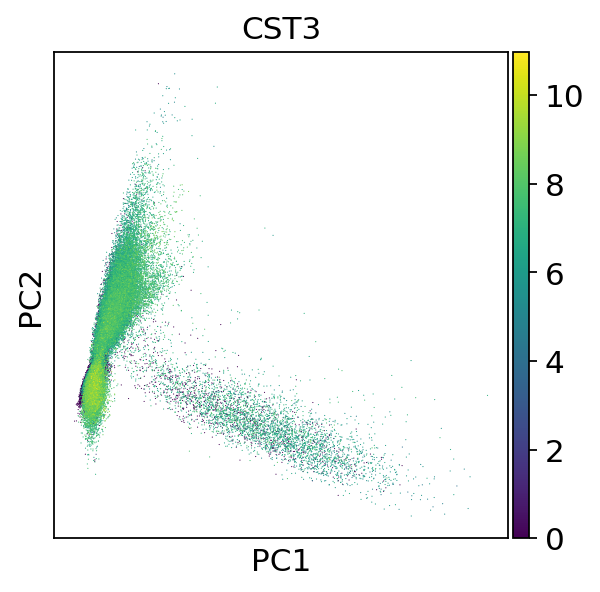

In [23]:
sc.tl.pca(adata, n_comps=50)
sc.pl.pca(adata, color='CST3')


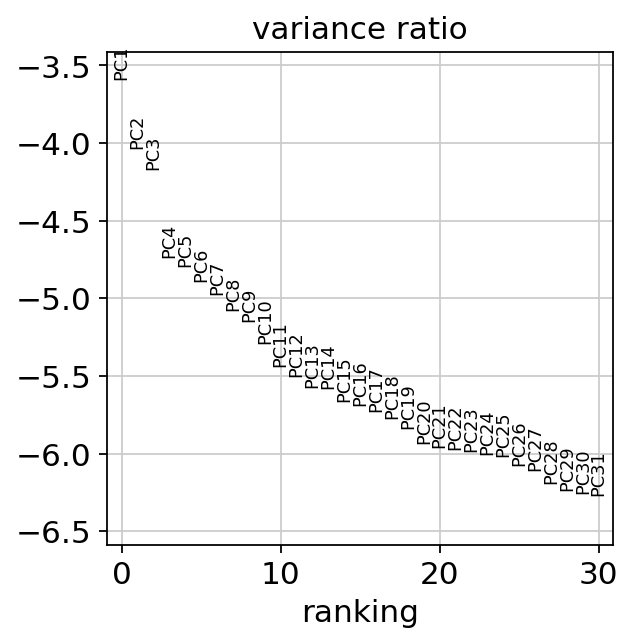

In [24]:
sc.pl.pca_variance_ratio(adata, log=True)


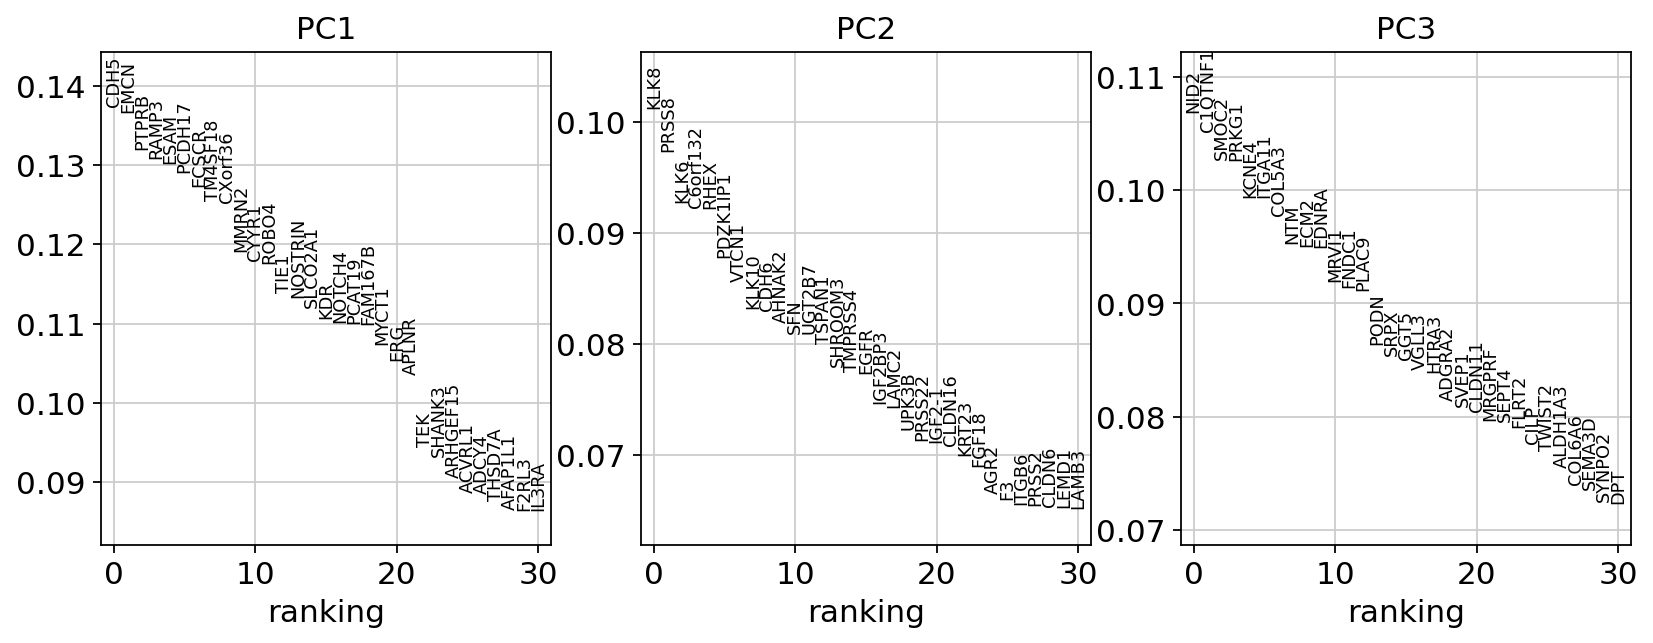

In [25]:
sc.pl.pca_loadings(adata, include_lowest=False)


## Compute and embed neighborhood graph

In [26]:
# valculate neighborhood graph
sc.pp.neighbors(adata)

# make umap
sc.tl.umap(adata)


computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:26)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:40)


## Cluster the neighborhood graph

running Leiden clustering


/tmp/ipykernel_2262579/1276134756.py:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.7)


    finished: found 32 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:01:09)


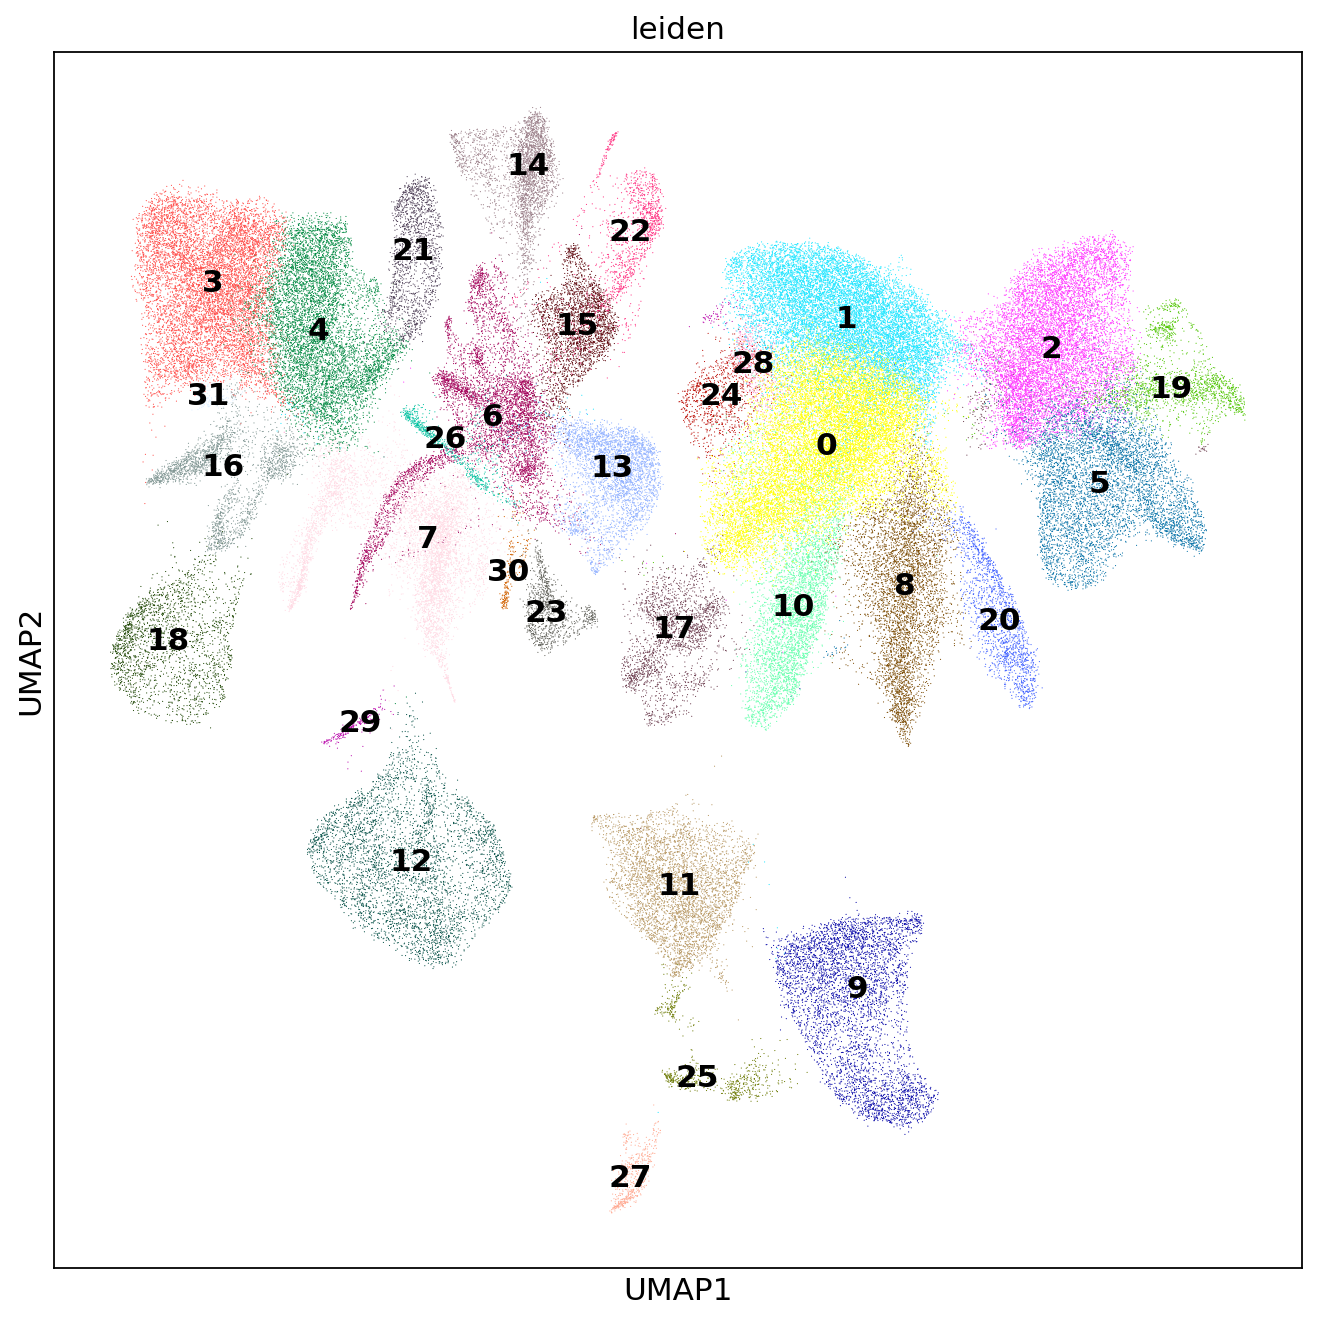

In [27]:
# lets use Leiden clustering
sc.tl.leiden(adata, resolution=0.7)
with rc_context({'figure.figsize': (10, 10)}):
    sc.pl.umap(adata, color='leiden', legend_loc='on data')



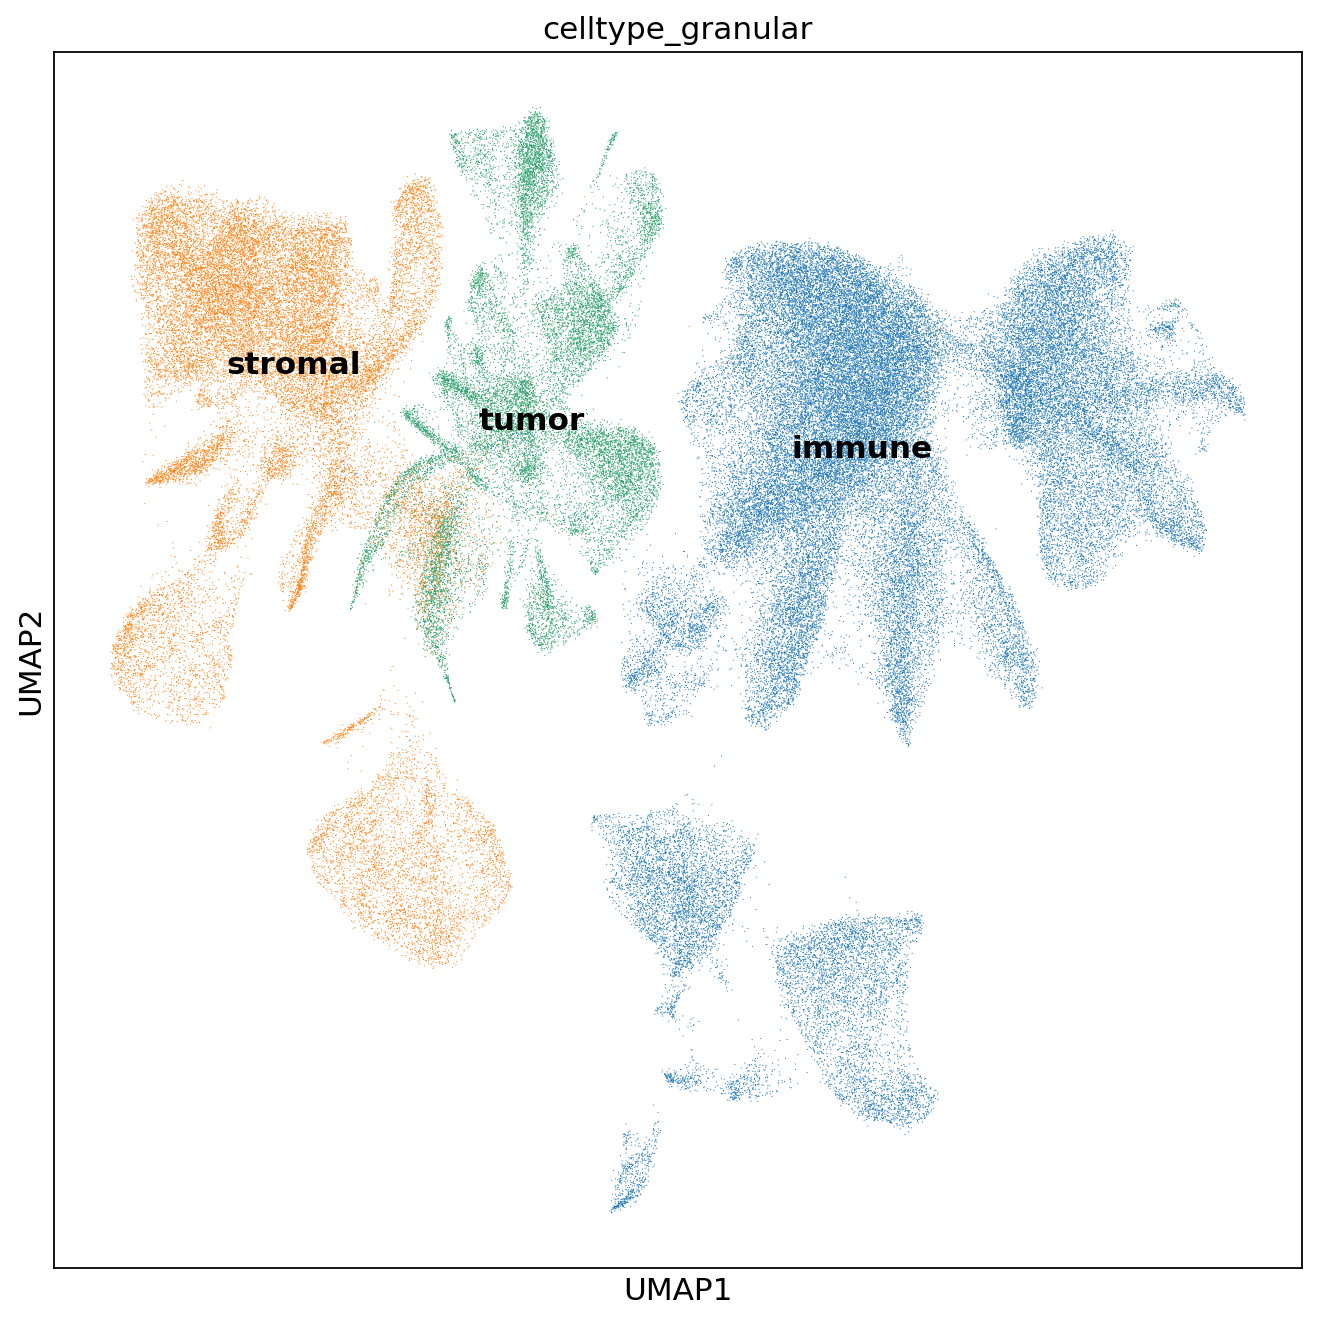

In [28]:
# lets use previously identified clustering
with rc_context({'figure.figsize': (10, 10)}):
    sc.pl.umap(adata, color='celltype_granular', legend_loc='on data')


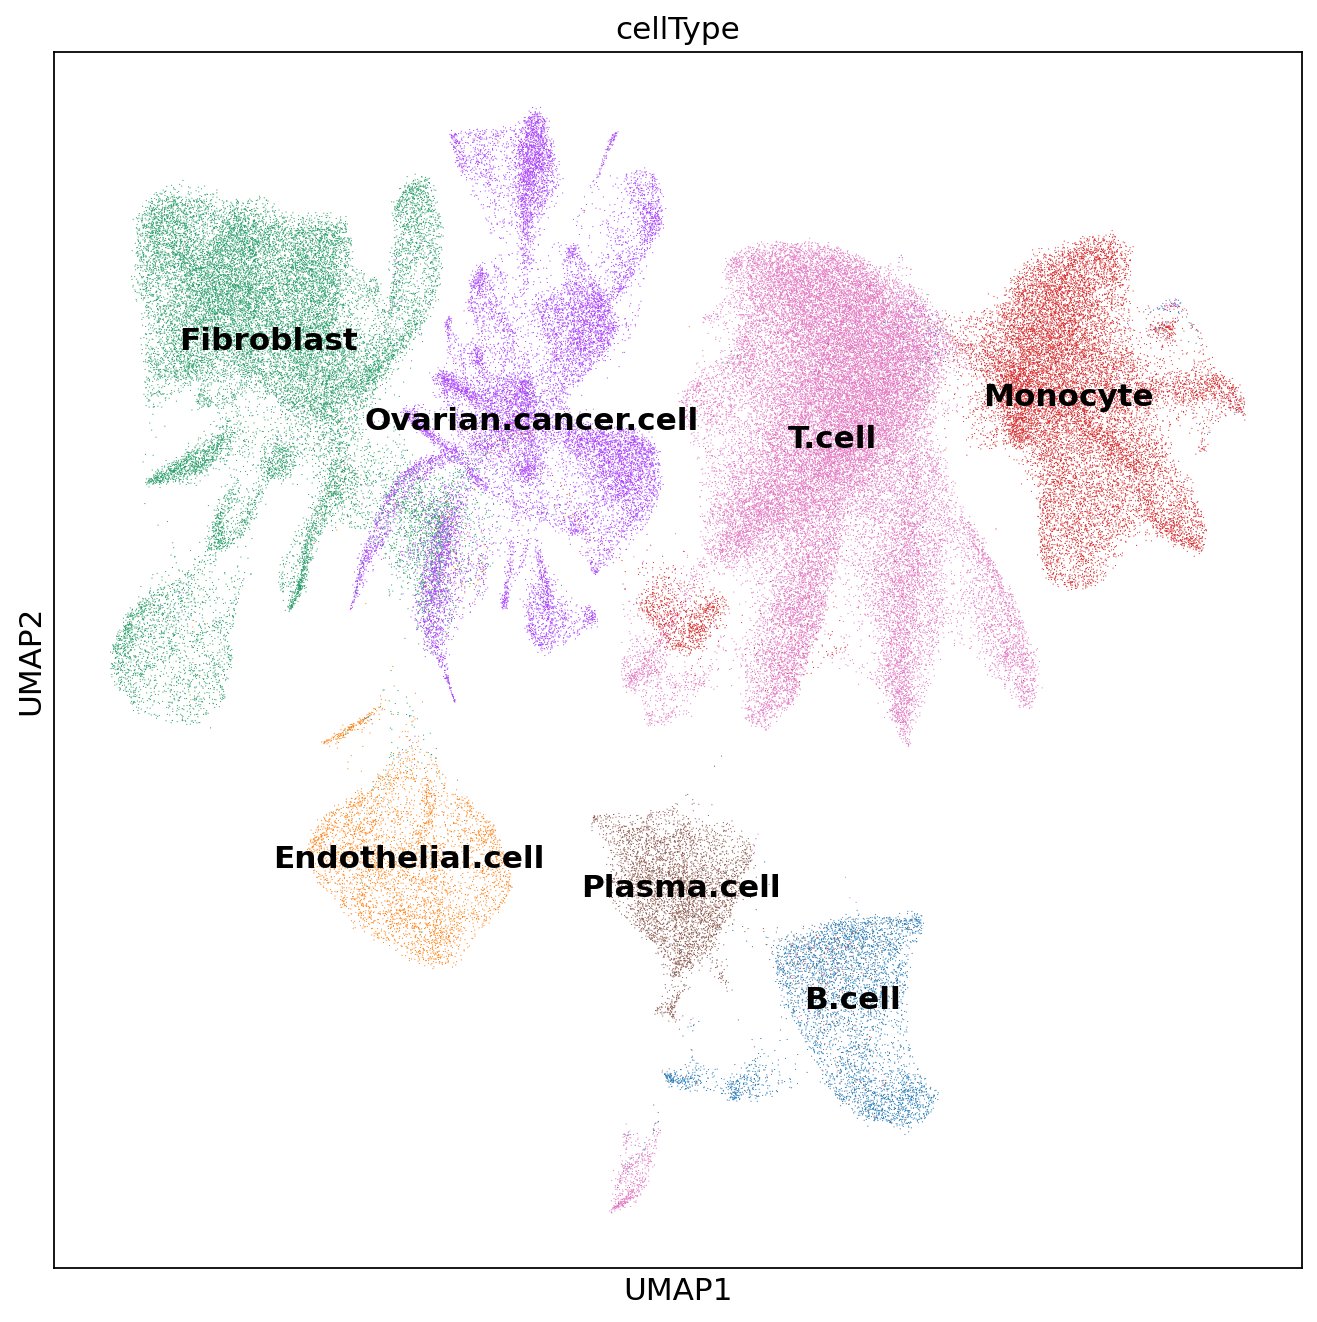

In [29]:
# lets use previously identified clustering
with rc_context({'figure.figsize': (10, 10)}):
    sc.pl.umap(adata, color='cellType', legend_loc='on data')


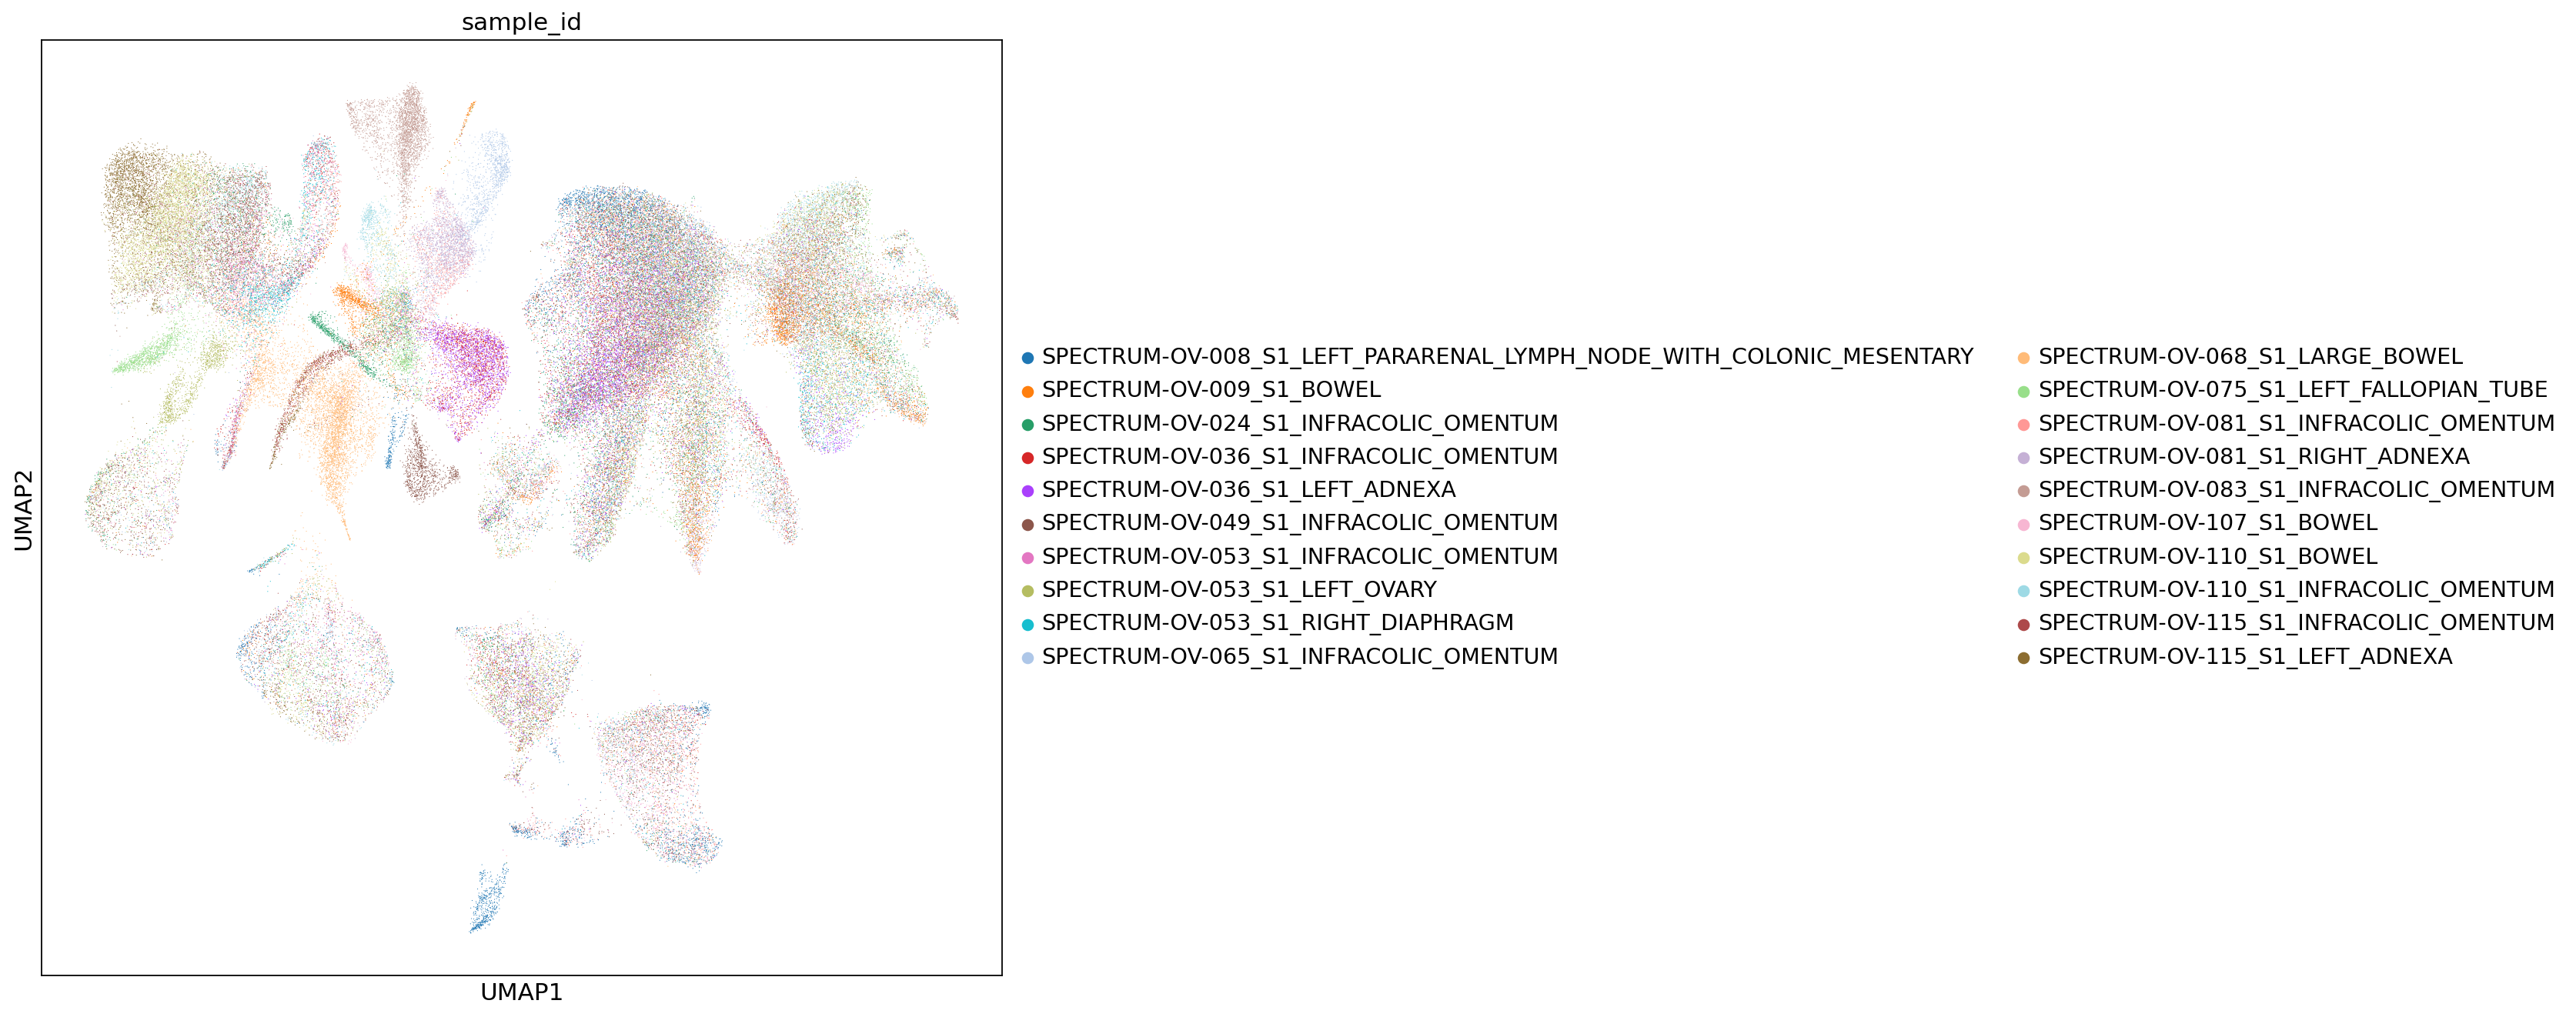

In [30]:
# plot by sample id
with rc_context({'figure.figsize': (10, 10)}):
    sc.pl.umap(adata, color='sample_id')


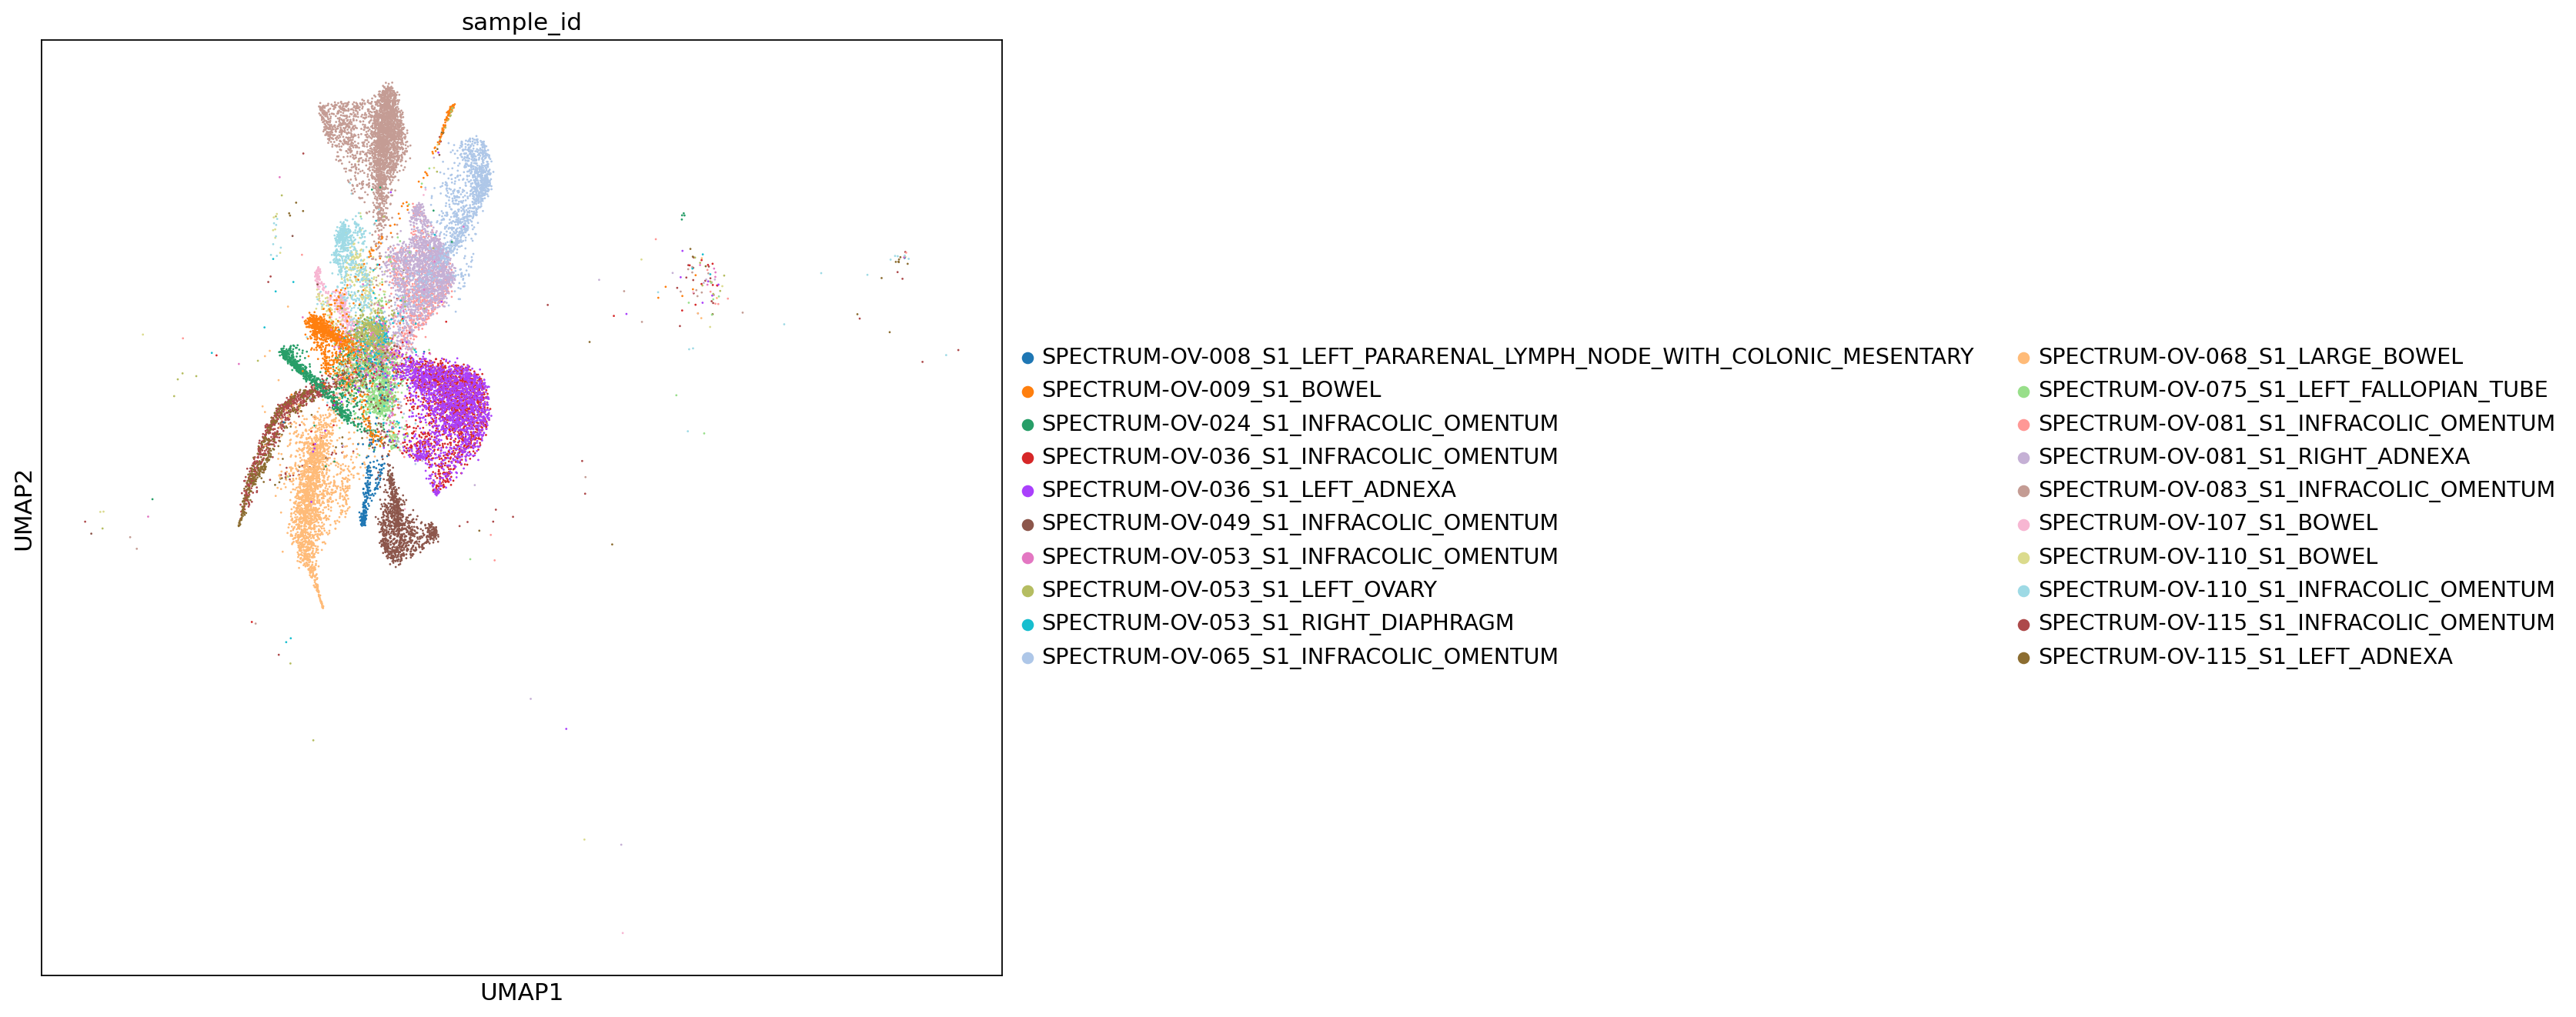

In [31]:
# plot by sample id
with rc_context({'figure.figsize': (10, 10)}):
    sc.pl.umap(adata[np.where(adata.obs.celltype_granular == "tumor")[0]], color='sample_id')
